In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv') 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df_cols = df.columns 
num_cols = [] 
obj_cols = [] 
for col in df_cols: 
    if df[col].dtype == 'object': 
        obj_cols.append(col) 
    else: 
        num_cols.append(col)   
print("Total Columns:", df_cols)  
print("Numeric Columns:", num_cols) 
print("Object Columns:", obj_cols)

Total Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Numeric Columns: ['age', 'bmi', 'children', 'charges']
Object Columns: ['sex', 'smoker', 'region']


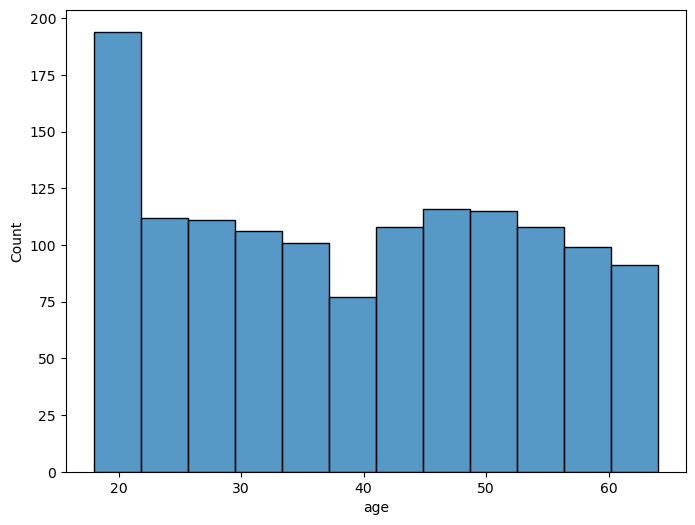

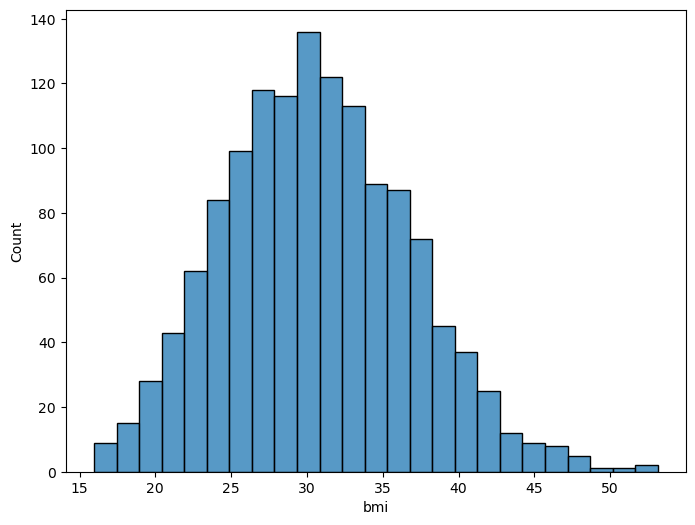

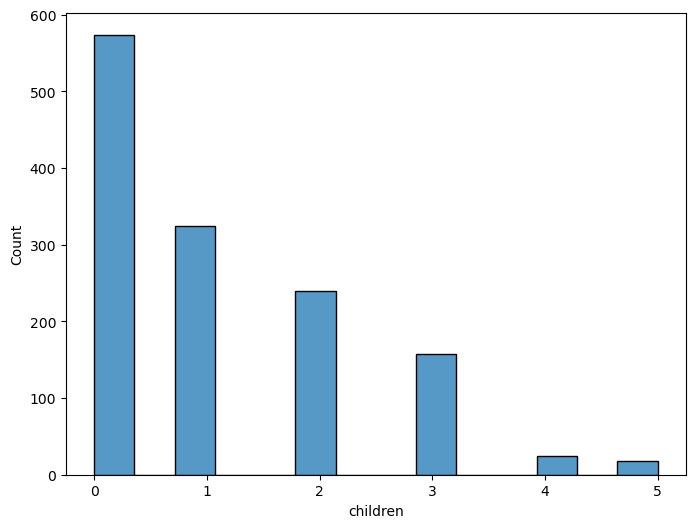

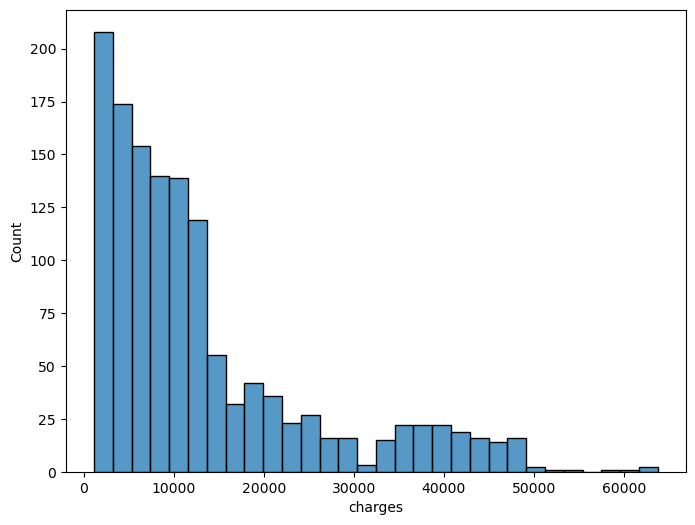

In [8]:
for col in num_cols: 
    plt.figure(figsize= (8, 6)) 
    sns.histplot(df[col]) 
    plt.show()

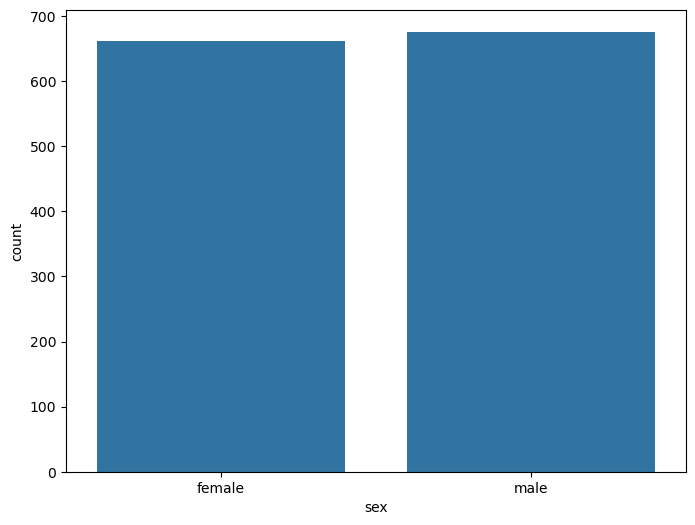

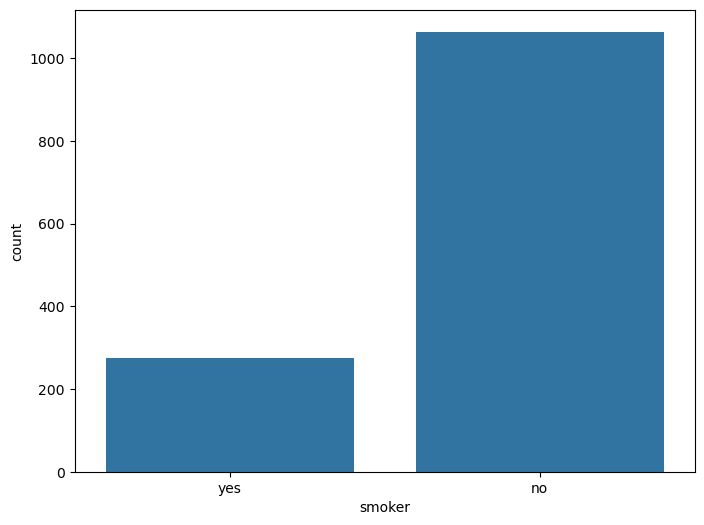

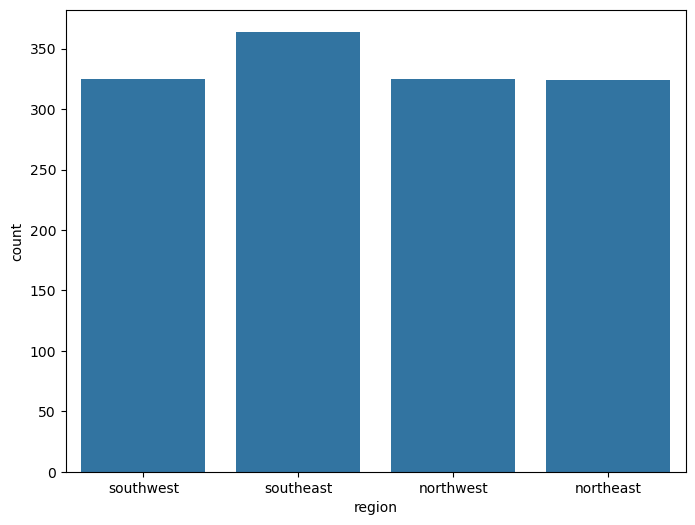

In [9]:
for col in obj_cols:  
    plt.figure(figsize= (8, 6))  
    sns.countplot(x= df[col]) 
    plt.show()

In [74]:
X = df.drop(['charges'], axis= 1) 
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [75]:
y = df['charges']

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
scale = StandardScaler()  

col_for_le = ['sex', 'smoker'] 
col_for_scale = ['age', 'bmi', 'children'] 

for col in col_for_le: 
    le = LabelEncoder()  
    X[col] = le.fit_transform(X[col])      

X[col_for_scale] = scale.fit_transform(X[col_for_scale])    
X

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,southwest
1,-1.509965,1,0.509621,-0.078767,0,southeast
2,-0.797954,1,0.383307,1.580926,0,southeast
3,-0.441948,1,-1.305531,-0.908614,0,northwest
4,-0.513149,1,-0.292556,-0.908614,0,northwest
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,northwest
1334,-1.509965,0,0.206139,-0.908614,0,northeast
1335,-1.509965,0,1.014878,-0.908614,0,southeast
1336,-1.296362,0,-0.797813,-0.908614,0,southwest


In [77]:
X = pd.get_dummies(X, columns= ['region']) 
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,False,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,False,False,True,False
2,-0.797954,1,0.383307,1.580926,0,False,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,False,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,False,True,False,False
1334,-1.509965,0,0.206139,-0.908614,0,True,False,False,False
1335,-1.509965,0,1.014878,-0.908614,0,False,False,True,False
1336,-1.296362,0,-0.797813,-0.908614,0,False,False,False,True


In [78]:
X[['region_northeast', 'region_northwest', 
   'region_southeast', 'region_southwest']] = X[['region_northeast', 'region_northwest', 
                                                 'region_southeast', 'region_southwest']].astype('int') 
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,0,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,1,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,0,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,0,0,0,1


In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,random_state= 42)

In [101]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]

# Meta-model
meta_model = LinearRegression()

# Stacking Regressor
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

stack_model.fit(X_train, y_train) 
stack_model_y_pred = stack_model.predict(X_test)  

print("Training Accuracy", stack_model.score(X_train, y_train))  
print("Testing Accuracy", stack_model.score(X_test, y_test))
score = cross_val_score(stack_model, X, y, cv= 5) 
print("Cross val score", score.mean())

Training Accuracy 0.8806500666771969
Testing Accuracy 0.8618372244686955
Cross val score 0.8600169698971634


In [102]:
import joblib 
joblib.dump(stack_model, 'model.pkl')

['model.pkl']